In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os

In [4]:
df=pd.read_table('FigS14.csv',sep='\t')
df.head()

,Genotype,Individual,Condition,Red,Green,Greenness,Area (cm2)
0,Col-0,#1,Fe,119.1587,142.4878,1.195782,12.0336
1,Col-0,#2,Fe,112.9515,136.9591,1.212548,13.0238
2,Col-0,#3,Fe,115.1010,137.8381,1.197540,10.6260
3,Col-0,#4,Fe,136.1526,154.5283,1.134964,5.5982
4,Col-0,#5,Fe,117.7164,139.7615,1.187273,8.0635


In [8]:
Fe=df.loc[df['Condition'] == 'Fe']
Control=df.loc[df['Condition'] == 'Standard']

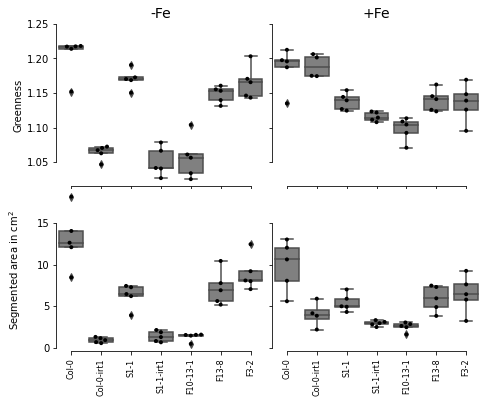

In [14]:
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
boxprops = {'edgecolor': 'black', 'linewidth': 0.5, 'facecolor': 'grey'}
lineprops = {'color': 'k', 'linewidth': 0.5}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops,
                       'width': 0.6})
swarmplot_kwargs = dict({'size': 1.5,'color':'black'})
Order=['Col-0','Col-0-irt1','S1-1','S1-1-irt1','F10-13-1','F13-8','F3-2']
cm=1/2.54
fig,axes = plt.subplots(2,2,sharey='row',figsize=(17*cm,14*cm))
def plot(phenotype,idx1,idx2,condition):
    sns.boxplot(x='Genotype',
                y=phenotype,
                data=df.loc[df['Condition'] == condition],
                color='grey',
                order=Order,
                ax=axes[idx1,idx2])
    sns.swarmplot(x='Genotype',
                y=phenotype,
                data=df.loc[df['Condition'] == condition],
                color='0',
                order=Order,
                s=4,
                ax=axes[idx1,idx2])
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].tick_params(labelsize=10)
    axes[idx1,idx2].tick_params(labelsize=10,axis='x',rotation=90)
    axes[idx1,idx2].set_xlabel('')

plot('Greenness',0,0,'Standard') 
axes[0,0].set_ylim(ymax=1.25)
axes[0,0].set_ylabel('Greenness')
axes[0,0].set_title('-Fe',fontsize=14)
axes[0,0].set_xticklabels([])
plot('Greenness',0,1,'Fe') 
axes[0,1].set_ylabel('')
axes[0,1].set_title('+Fe',fontsize=14)
axes[0,1].set_xticklabels([])
plot('Area (cm2)',1,0,'Standard')  
axes[1,0].set_ylabel('Segmented area in cm$^2$')
plot('Area (cm2)',1,1,'Fe')    
axes[1,1].set_ylabel('')
sns.despine(trim=True)
axes[1,0].tick_params(labelrotation=90,labelsize=8,axis='x')
axes[1,1].tick_params(labelrotation=90,labelsize=8,axis='x')
fig.align_ylabels(axes[:, ])
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=0)
plt.savefig("FigS14.png", format="png",bbox_inches="tight",facecolor="w",dpi=600)

